In [1]:
# TensorFlow and tf.keras
import tensorflow as tf
from tensorflow import keras

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

2.1.0


## Import the Fashion MNIST dataset

In [2]:
fashion_df = keras.datasets.fashion_mnist

(x_train, y_train), (x_test, y_test) = fashion_df.load_data()

In [4]:
apparel_groups = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

## Explore the data

Let's explore the format of the dataset before training the model. The following shows there are 60,000 images in the training set, with each image represented as 28 x 28 pixels:

In [5]:
x_train.shape

(60000, 28, 28)

In [6]:
len(y_train)

60000

Each label is an integer between 0 and 9:

In [7]:
y_train

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

There are 10,000 images in the test set. Again, each image is represented as 28 x 28 pixels:

In [8]:
x_train.shape

(60000, 28, 28)

And the test set contains 10,000 images labels:

In [9]:
len(y_train)

60000

## Preprocess the data

The data must be preprocessed before training the network. If you inspect the first image in the training set, you will see that the pixel values fall in the range of 0 to 255:

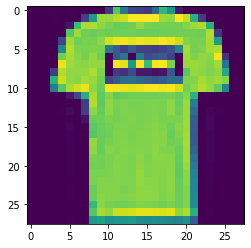

In [10]:
plt.figure()
plt.imshow(x_train[1])
plt.show()

Scale these values to a range of 0 to 1 before feeding them to the neural network model. To do so, divide the values by 255. It's important that the *training set* and the *testing set* be preprocessed in the same way:

In [12]:
x_train = x_train / 255.0

x_test = x_test / 255.0

To verify that the data is in the correct format and that you're ready to build and train the network, let's display the first 25 images from the *training set* and display the class name below each image.

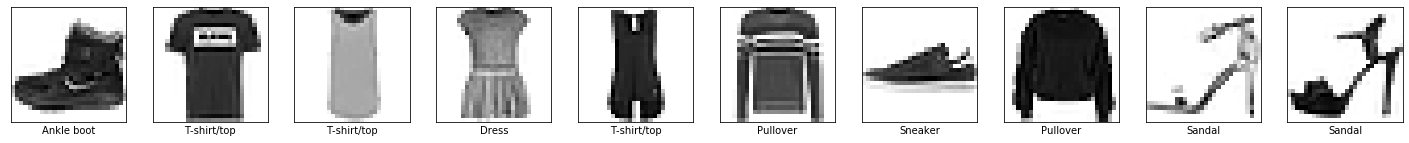

In [13]:
plt.figure(figsize=(25,25))
for i in range(10):
    plt.subplot(10,10,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_train[i], cmap=plt.cm.binary)
    plt.xlabel(apparel_groups[y_train[i]])
plt.show()

## Build the model

Building the neural network requires configuring the layers of the model, then compiling the model.

### Set up the layers

The basic building block of a neural network is the *layer*. Layers extract representations from the data fed into them. Hopefully, these representations are meaningful for the problem at hand.

Most of deep learning consists of chaining together simple layers. Most layers, such as `tf.keras.layers.Dense`, have parameters that are learned during training.

In [14]:
fashion_model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(256, activation='relu'),
    keras.layers.Dense(20)
])

The first layer in this network, `tf.keras.layers.Flatten`, transforms the format of the images from a two-dimensional array (of 28 by 28 pixels) to a one-dimensional array (of 28 * 28 = 784 pixels). Think of this layer as unstacking rows of pixels in the image and lining them up. This layer has no parameters to learn; it only reformats the data.

After the pixels are flattened, the network consists of a sequence of two `tf.keras.layers.Dense` layers. These are densely connected, or fully connected, neural layers. The first `Dense` layer has 128 nodes (or neurons). The second (and last) layer returns a logits array with length of 10. Each node contains a score that indicates the current image belongs to one of the 10 classes.

### Compile the model

Before the model is ready for training, it needs a few more settings. These are added during the model's *compile* step:

* *Loss function* —This measures how accurate the model is during training. You want to minimize this function to "steer" the model in the right direction.
* *Optimizer* —This is how the model is updated based on the data it sees and its loss function.
* *Metrics* —Used to monitor the training and testing steps. The following example uses *accuracy*, the fraction of the images that are correctly classified.

In [15]:
fashion_model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

## Train the model

Training the neural network model requires the following steps:

1. Feed the training data to the model. In this example, the training data is in the `train_images` and `train_labels` arrays.
2. The model learns to associate images and labels.
3. You ask the model to make predictions about a test set—in this example, the `test_images` array.
4. Verify that the predictions match the labels from the `test_labels` array.


### Feed the model

To start training,  call the `model.fit` method—so called because it "fits" the model to the training data:

In [16]:
fashion_model = fashion_model.fit(x_train, y_train,
          batch_size=10,
          epochs=50,
          verbose=1,
          validation_data=(x_test, y_test))


Train on 60000 samples, validate on 10000 samples
Epoch 1/50
60000/60000 [==============================] - 9s 147us/sample - loss: 0.4768 - accuracy: 0.8288 - val_loss: 0.4368 - val_accuracy: 0.8440
Epoch 2/50
60000/60000 [==============================] - 9s 142us/sample - loss: 0.3641 - accuracy: 0.8680 - val_loss: 0.3935 - val_accuracy: 0.8601
Epoch 3/50
60000/60000 [==============================] - 9s 149us/sample - loss: 0.3280 - accuracy: 0.8797 - val_loss: 0.3853 - val_accuracy: 0.8571
Epoch 4/50
60000/60000 [==============================] - 12s 198us/sample - loss: 0.3056 - accuracy: 0.8873 - val_loss: 0.3724 - val_accuracy: 0.8687
Epoch 5/50
60000/60000 [==============================] - 10s 168us/sample - loss: 0.2886 - accuracy: 0.8922 - val_loss: 0.3866 - val_accuracy: 0.8672
Epoch 6/50
60000/60000 [==============================] - 9s 148us/sample - loss: 0.2754 - accuracy: 0.8979 - val_loss: 0.3792 - val_accuracy: 0.8738
Epoch 7/50
60000/60000 [========================

### Evaluate accuracy

Next, compare how the model performs on the test dataset:

In [17]:
fashion_model.history

{'loss': [0.47679444474040067,
  0.36410108210590747,
  0.32799065023398727,
  0.3056385327440997,
  0.28855843354787064,
  0.2753580907764017,
  0.2639151226724959,
  0.2531239317424042,
  0.2433863418705805,
  0.23653681418262326,
  0.22847250746306721,
  0.22246890289394106,
  0.21542628190832813,
  0.21030850506283533,
  0.20516543447573668,
  0.1993468752997551,
  0.19540881394255363,
  0.19116263189806973,
  0.18601891033807752,
  0.18350515566799397,
  0.17880290566500334,
  0.17535900910915087,
  0.17189707416599076,
  0.16804774309849405,
  0.16328546819129267,
  0.1619038892395482,
  0.15887451212006448,
  0.15749348763139262,
  0.15145183612666005,
  0.15237183274402188,
  0.1473557373551016,
  0.14515728053684634,
  0.14302227388309594,
  0.14097508813813925,
  0.13777796074086776,
  0.13706570368876067,
  0.13394525235503063,
  0.13066625888624633,
  0.1290386533490503,
  0.12815406144981203,
  0.12669129577356453,
  0.12469658407427366,
  0.12316485937253976,
  0.11890079

Text(0, 0.5, 'acc')

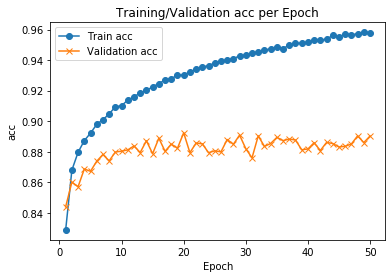

In [18]:
import matplotlib.pyplot as plt
f, ax = plt.subplots()
ax.plot([None] + fashion_model.history['accuracy'], 'o-')
ax.plot([None] + fashion_model.history['val_accuracy'], 'x-')
ax.legend(['Train acc', 'Validation acc'], loc = 0)
ax.set_title('Training/Validation acc per Epoch')
ax.set_xlabel('Epoch')
ax.set_ylabel('acc')

Text(0, 0.5, 'acc')

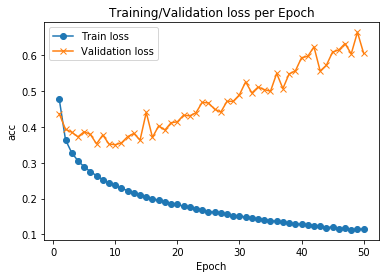

In [19]:
import matplotlib.pyplot as plt
f, ax = plt.subplots()
ax.plot([None] + fashion_model.history['loss'], 'o-')
ax.plot([None] + fashion_model.history['val_loss'], 'x-')
ax.legend(['Train loss', 'Validation loss'], loc = 0)
ax.set_title('Training/Validation loss per Epoch')
ax.set_xlabel('Epoch')
ax.set_ylabel('acc')

In [20]:
test_loss, test_acc = fashion_model.model.evaluate(x_test,  y_test, verbose=2)

print('Test accuracy:', test_acc)

10000/10000 - 0s - loss: 0.6056 - accuracy: 0.8903
Test accuracy: 0.8903
